In [1]:
!pip install tensorflow

  Using cached wrapt-1.16.0-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.6 kB)
  Using cached wheel-0.44.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 49.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 88.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 67.5 MB/s eta 0:00:00
Using cached wrapt-1.16.0-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86

# TensorFlow

![Tensors](https://miro.medium.com/v2/resize:fit:1400/0*jGB1CGQ9HdeUwlgB)

TensorFlow is an `open-source` library for numerical computation on tensors that uses directed graphs to represent the computation that you want to do.


Tensorflow graphs are portable between different devices.

### TensorFlow API hierarchy

![TF API abstraction layers](./img/lab_9_tf_api.png)

* The lowest layer of abstraction is the layer that's implemented to target the different hardware platforms.
* The next level is the TensorFlow C++ API where you can write custom TensorFlow operations.
* The core Python API is what contains much of the numeric processing code to work with tensors
* Sets of Python modules that have high-level representation of useful neural network components. These modules are useful when building custom neural network models.
* Lastly, the high-level APIs allow you to easily do distributed training, data preprocessing, the model definition, compilation and overall training.

## TF tensors and variable

In [1]:
import tensorflow as tf

2024-11-05 22:08:49.808116: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730844529.833947  322688 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730844529.841718  322688 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-05 22:08:49.867924: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# scalar
x = tf.constant(3)
print(x)
print(x.shape)

tf.Tensor(3, shape=(), dtype=int32)
()


2024-11-05 22:08:56.605333: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
# vector
x = tf.constant([3, 5, 7])
print(x.shape)

(3,)


In [65]:
# Matrix
x = tf.constant([[3, 5, 7],
                 [4, 6, 8]])
print(x.shape)

(2, 3)


In [66]:
# 3D Tensor
x3 = tf.stack([x, x])
print(x3.shape)

(2, 2, 3)


In [67]:
tf.stack([x3, x3]).shape

TensorShape([2, 2, 2, 3])

In [60]:
tf.stack([x, x, x]).shape

TensorShape([3, 1, 2])

note: Tensors can be reshaped. 

`tf.constant` produces constant tensors while `tf.Variable` can be modified.

In [7]:
x = tf.Variable(3.0, dtype=tf.float32, name='sample_variable')
x

<tf.Variable 'sample_variable:0' shape=() dtype=float32, numpy=3.0>

In [8]:
x.assign(6)
x

<tf.Variable 'sample_variable:0' shape=() dtype=float32, numpy=6.0>

In [9]:
x.assign_add(1)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=7.0>

Let's look at a simplified neural network architecture again

![NN](./img/lab_9_nn_recap.png)

In [10]:
# input data
x = tf.constant([[3, 4]])
# weights that will change
w = tf.Variable([[1], [2]])

# compute the dot product of weights and input feature
tf.matmul(w, x)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[3, 4],
       [6, 8]], dtype=int32)>

### TF Input Data Pipeline

`tf.data.Dataset` allows you to feed, preprocess, and configure data to TF models.

* create data pipelines from
    * in-memory dict or lists of tensors ```tf.data.Dataset.from_tensor_slices((X, Y))```
    * out-of-memory sharded data files ```tf.data.TFRecrodDataset(files)```
* preprocess data in parallel and cache result of costly operation ```dataset.map(expensive_function).cache()```
* configure data ```dataset.shuffle(1000).repeat(epochs).batch()```

# Regression with TF

## Load the data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Normalization


In [16]:
tf.random.set_seed(42)

In [17]:
# Abalone dataset https://archive.ics.uci.edu/ml/datasets/abalone
cols = ["Length", "Diameter", "Height",
         "Whole weight", "Shucked weight",
         "Viscera weight", "Shell weight", "Age"]

df_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv", header=None, 
    names=cols)


df_test = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_test.csv", header=None, 
    names=cols)

df_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          3320 non-null   float64
 1   Diameter        3320 non-null   float64
 2   Height          3320 non-null   float64
 3   Whole weight    3320 non-null   float64
 4   Shucked weight  3320 non-null   float64
 5   Viscera weight  3320 non-null   float64
 6   Shell weight    3320 non-null   float64
 7   Age             3320 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 207.6 KB


The nominal task for this dataset is to predict the age from the other measurements, so separate the features and labels for training:

In [68]:
X_train = df_train.copy()
y_train = X_train.pop('Age')


X_test = df_test.copy()
y_test = X_test.pop('Age')

In [69]:
y_test

0      12
1      12
2       7
3      10
4      15
       ..
845     9
846     8
847    13
848     8
849    11
Name: Age, Length: 850, dtype: int64

## Modeling

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. 

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [20]:
# Basic with no preprocessing
abalone_model = tf.keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='relu')
])

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
* Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* Optimizer —This is how the model is updated based on the data it sees and its loss function.
* Metrics —Used to monitor the training and testing steps.

In [21]:
abalone_model.compile(loss=tf.losses.MeanSquaredError(),
                    optimizer=tf.optimizers.Adam()
                    )

In [22]:
X_train.shape

(3320, 7)

In [23]:
abalone_model.build(input_shape=X_train.shape)
abalone_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (3320, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (3320, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 577 (2.25 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = abalone_model.fit(X_train, y_train,
                             epochs=10,
                             batch_size=16,
                             validation_data=(X_test, y_test)
                             )

Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 84.8927 - val_loss: 11.5797
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8946 - val_loss: 8.7244
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4713 - val_loss: 7.9793
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6201 - val_loss: 7.3927
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0131 - val_loss: 7.0945
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6648 - val_loss: 6.8633
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4430 - val_loss: 6.6801
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1799 - val_loss: 6.5165
Epoch 9/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0365 - val_loss: 6.3752
Epoch 10/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8820 - val_loss: 6.2468


In [25]:
df_history = pd.DataFrame(history.history)

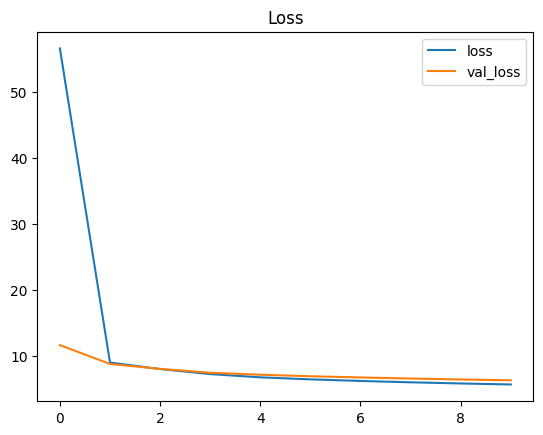

In [26]:
#  visualize the training loss with each epoch.
df_history['loss'].plot() 
df_history['val_loss'].plot() 
plt.title('Loss') 
plt.legend() 
plt.show() 

## Preprocessing

In [36]:
X_train = tf.convert_to_tensor(X_train)

In [37]:
normalizer = Normalization()
normalizer.adapt(X_train)

In [70]:
# use the normalization layer in the model
norm_abalone_model = tf.keras.Sequential([
  normalizer,
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='relu')
])

norm_abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                           optimizer = tf.optimizers.Adam())

history_norm = norm_abalone_model.fit(X_train, y_train,
                      epochs=10,
                      batch_size=16,
                      validation_data=(X_test, y_test)
)

Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 74.7458 - val_loss: 31.2949
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.9987 - val_loss: 12.7847
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.2421 - val_loss: 6.9396
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4506 - val_loss: 6.3983
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9034 - val_loss: 6.0758
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5526 - val_loss: 5.8516
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.3293 - val_loss: 5.6893
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1393 - val_loss: 5.5729
Epoch 9/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0189 - val_loss: 5.4917
Epoch 10/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9304 - val_loss: 5.4340


We use a loss function to determine how far the predicted values deviate from the actual values in the training data. ... We change the model weights to make the loss minimum, and that is what training is all about

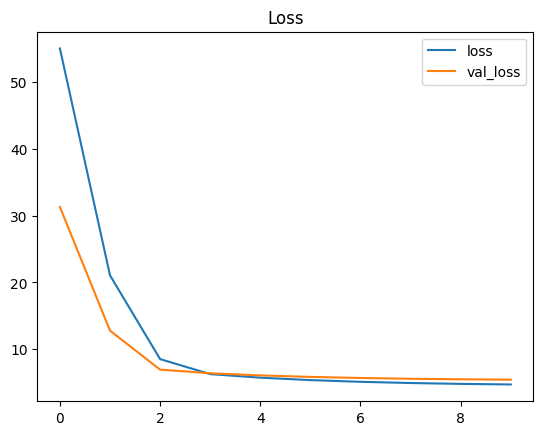

In [71]:
df_history_norm = pd.DataFrame(history_norm.history)

df_history_norm['loss'].plot() 
df_history_norm['val_loss'].plot() 
plt.title('Loss') 
plt.legend() 
plt.show()

## Classification Example

In [46]:
mnist = tf.keras.datasets.mnist

In [47]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [48]:
x_train[0].shape

(28, 28)

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

In [49]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_history = model.fit(x_train, 
                             y_train, 
                             epochs=10,
                             validation_split=0.2)

/usr/local/google/home/amirimani/Desktop/projects/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8144 - loss: 0.6130 - val_accuracy: 0.9542 - val_loss: 0.1498
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9429 - loss: 0.1889 - val_accuracy: 0.9606 - val_loss: 0.1275
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9569 - loss: 0.1440 - val_accuracy: 0.9683 - val_loss: 0.1057
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9650 - loss: 0.1150 - val_accuracy: 0.9697 - val_loss: 0.1019
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9703 - loss: 0.0964 - val_accuracy: 0.9718 - val_loss: 0.0962
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9725 - loss: 0.0868 - val_accuracy: 0.9727 - val_loss: 0.0981
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9746 - loss: 0.0815 - val_accuracy: 0.9747 - val_loss: 0.0921
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9771 - loss: 0.0709 - 

In [50]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [51]:
# Evaluate returns the loss value and metrics values for the model.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.1077


[0.08951330929994583, 0.9796000123023987]

You can learn a lot about neural networks and deep learning models by observing their performance over time during training.

In [52]:
training_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [57]:
from sklearn.metrics import f1_score


# Make predictions
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' to account for class imbalance

# Print results
print(f'F1 Score: {f1:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
F1 Score: 0.9796


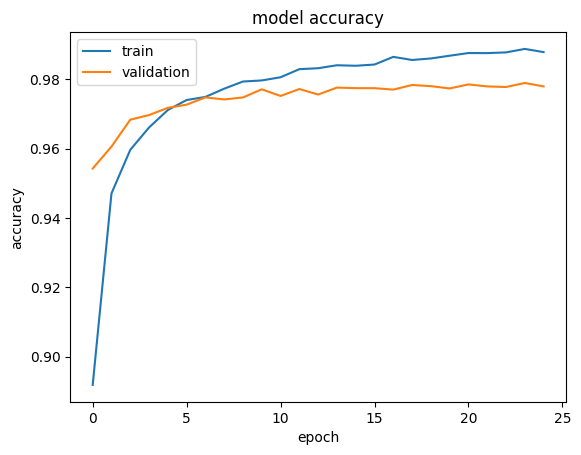

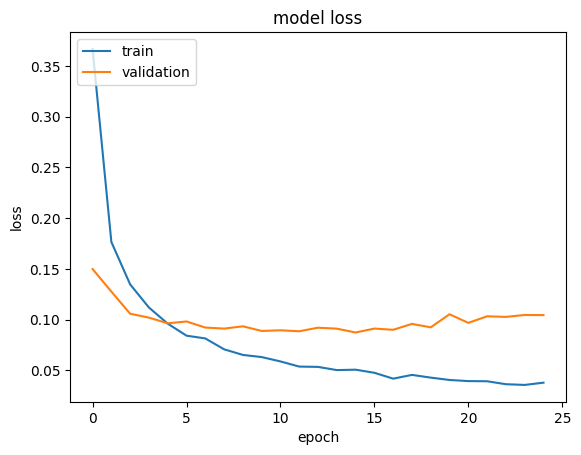

In [53]:
# summarize history for accuracy
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [54]:
# Savemodel is the universal serialization format for TF models
tf.saved_model.save(model, './exports/models/')

INFO:tensorflow:Assets written to: ./exports/models/assets


INFO:tensorflow:Assets written to: ./exports/models/assets
